In [1]:
import numpy as np 
import scipy.stats as sts 
import scipy.special as sc 
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Задание 1

## а)Визуализация рядов распределения

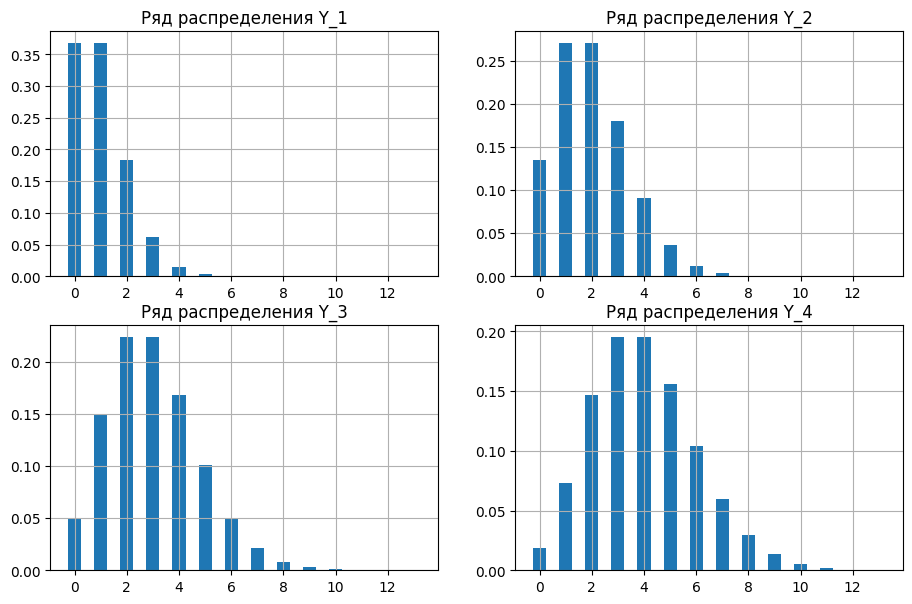

In [2]:
lm1 = 1  
k = [1,2,3,4] 

#вероятность принять значение x
def pmf(x,lm):
    return ((lm**x) * math.exp(-lm))/math.factorial(x)

#визуализация рядов распределения
plt.figure(figsize=(11,7))
for i,k in enumerate(k):
    lm = k*lm1
    x_k = np.arange(0,14) 
    p_k = [pmf(x,lm) for x in x_k] #вероятности для каждого x_k
    plt.subplot(2,2,i+1)
    plt.bar(x_k,p_k,width=0.5)
    plt.title(f'Ряд распределения Y_{k}')
    plt.grid(True)

## б)Построение графиков функций распределения

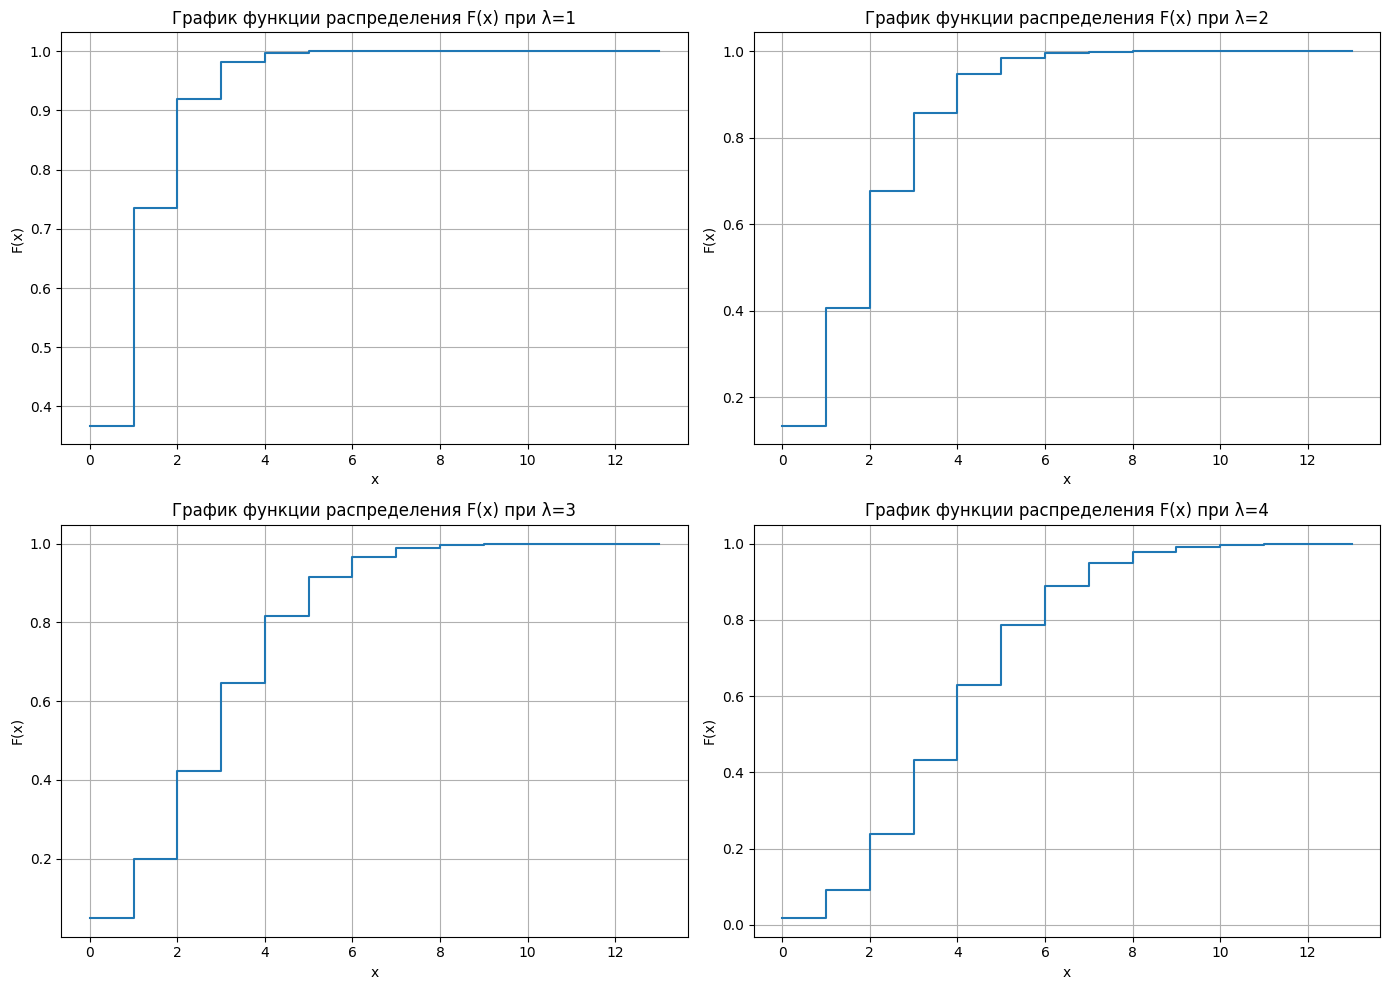

In [24]:
k = [1,2,3,4] 

def cdf(x,lm):
    puas = sts.poisson(lm) 
    return puas.cdf(x)

plt.figure(figsize=(14,10))
for i, k in enumerate(k):
    lm = k*lm1
    x_k = np.arange(0,14)
    p_k = [cdf(x,lm) for x in x_k]  # Вероятности для каждого x_k
    
    # Создание подграфика
    plt.subplot(2, 2, i + 1)
    plt.step(x_k,p_k,where='post')  # Используем ступенчатую функцию
    plt.title(f'График функции распределения F(x) при λ={k}')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.grid(True)
plt.tight_layout()  # Чтобы графики не перекрывались
plt.show()

## в)Нахождение вероятностей отклонения от математического ожидания более чем на три средних квадратичных отклонения

In [ ]:
k = [1, 2, 3, 4] 

for i,k in enumerate(k):
    lm=k*lm1
    puas=sts.poisson(lm) #закон распределения 
    mean=puas.mean() #мат.ожидание
    std=puas.std() #среднее квадратичное отклонение
    pr = 1-puas.cdf(mean+3*std)+puas.cdf(mean-3*std)
    print(f'Для Y_{k}:')
    print(f'Вероятность отклонения более чем на 3 стандартных отклонения:',pr)
    print()

## г)Визуализируйте (проиллюстрируйте графически) асимптотичускую нормальность закона Пуассона

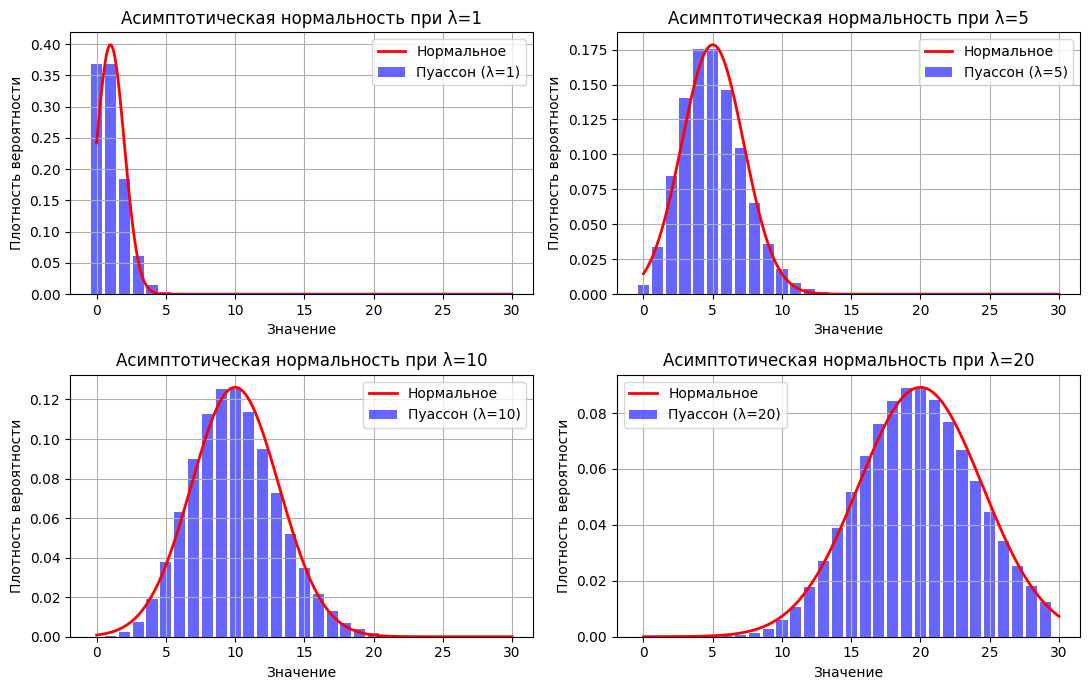

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

#параметры
lm_val = [1,5,10,20] 

plt.figure(figsize=(11,7))
for i, lm in enumerate(lm_val):
    x = np.arange(0,30)
    pois = poisson.pmf(x,mu=lm) #распределения Пуассона
    
    x_norm = np.linspace(0,30,1000) #нормальное распределение
    norm_pdf = norm.pdf(x_norm,loc=lm,scale=np.sqrt(lm)) #плотность распределения
    
    plt.subplot(2, 2, i + 1)
    plt.bar(x,pois,alpha=0.6,color='blue',label=f'Пуассон (λ={lm})')
    plt.plot(x_norm,norm_pdf,color='red',linewidth=2,label='Нормальное')
    plt.title(f'Асимптотическая нормальность при λ={lm}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# Задание 2


## 1. Плотность распределения случайной величины 𝑋 и её график

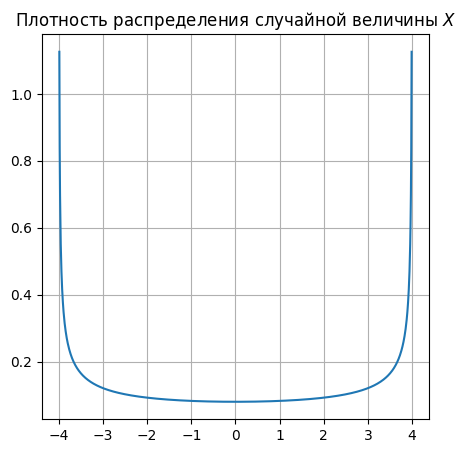

In [5]:
#плотность распределения
def f(x):
    return 1/(4*np.pi*np.sqrt(1-(x/4)**2))

x_values = np.linspace(-3.99,3.99,1000)
y_values = f(x_values)
plt.figure(figsize=(5,5))
plt.plot(x_values,y_values)
plt.title("Плотность распределения случайной величины $X$")
plt.grid(True)

## 2. Мода, медиана, математическое ожидание, дисперсию,квантили порядков 0,25 и 0,75, коэффициенты асимметрии и эксцесса

In [40]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import skew, kurtosis
from scipy.optimize import root_scalar

def F(x):
    if x<=-4:
        return 0.0
    elif -4<x<4:
        return 0.5+(1/np.pi)*np.arcsin(x/4)
    else:
        return 1.0
        
def f(x):
    return np.where((-4<x)&(x<4), 1/(np.pi*np.sqrt(16-x**2)),0.0)

mode = 0  #для закона арксинуса мода находится в точке 0
mediana = 0 #для симметричного распределения медиана равна 0
m_x,_ = quad(lambda x:x*f(x),-4,4)
m_x2,_ = quad(lambda x:x**2 * f(x),-4,4)
D_x = m_x2 - m_x**2

def find_quantile(p):
    if p<=0:
        return -4
    elif p>=1:
        return 4
    else:
        result = root_scalar(lambda x: F(x)-p,bracket=[-4, 4])
        return result.root

q_25 = find_quantile(0.25)
q_75 = find_quantile(0.75)

x_val = np.linspace(-3.99,3.99,10000)
prob = f(x_values)/np.sum(f(x_values))
data = np.random.choice(x_val,size=100000,p=prob)
assim = skew(data)
exc = kurtosis(data)

print(f'Мода: {mode}')
print(f'Медиана: {mediana}')
print(f'Математическое ожидание: {m_x}')
print(f'Дисперсия: {D_x}')
print(f'Квантиль порядка 0.25: {q_25}')
print(f'Квантиль порядка 0.75: {q_75}')
print(f'Коэффициент асимметрии: {assim}')
print(f'Коэффициент эксцесса: {exc}')

Мода: 0
Медиана: 0
Математическое ожидание: 0.0
Дисперсия: 7.999999999999237
Квантиль порядка 0.25: -2.8284271247460446
Квантиль порядка 0.75: 2.828427124746044
Коэффициент асимметрии: -0.004230930099752986
Коэффициент эксцесса: -1.4757392029620373


## 3. Вероятность того, что случайная величина отклонится от математического ожидания менее, чем на 𝑘𝜎 (𝑘 = 1,2,3)

In [34]:
def F(x):
    if x<=-4:
        return 0.0
    elif -4<x<4:
        return 0.5+(1/np.pi)*np.arcsin(x/4)
    else:
        return 1.0
        
q = np.sqrt(D_x)
k_values = [1,2,3]
prob = {}
for k in k_values:
    P_k = F(m_x+k*q)-F(m_x-k*q)
    prob[k] = P_k
for k in k_values:
    print(f'Вероятность того, что |X-M[X]|<{k}σ: {prob[k]:.4f}')

Вероятность того, что |X-M[X]|<1σ: 0.5000
Вероятность того, что |X-M[X]|<2σ: 1.0000
Вероятность того, что |X-M[X]|<3σ: 1.0000


## 4. В одной системе координат графики функции распределения и график функции, определяющей зависимость квантили от ее порядка

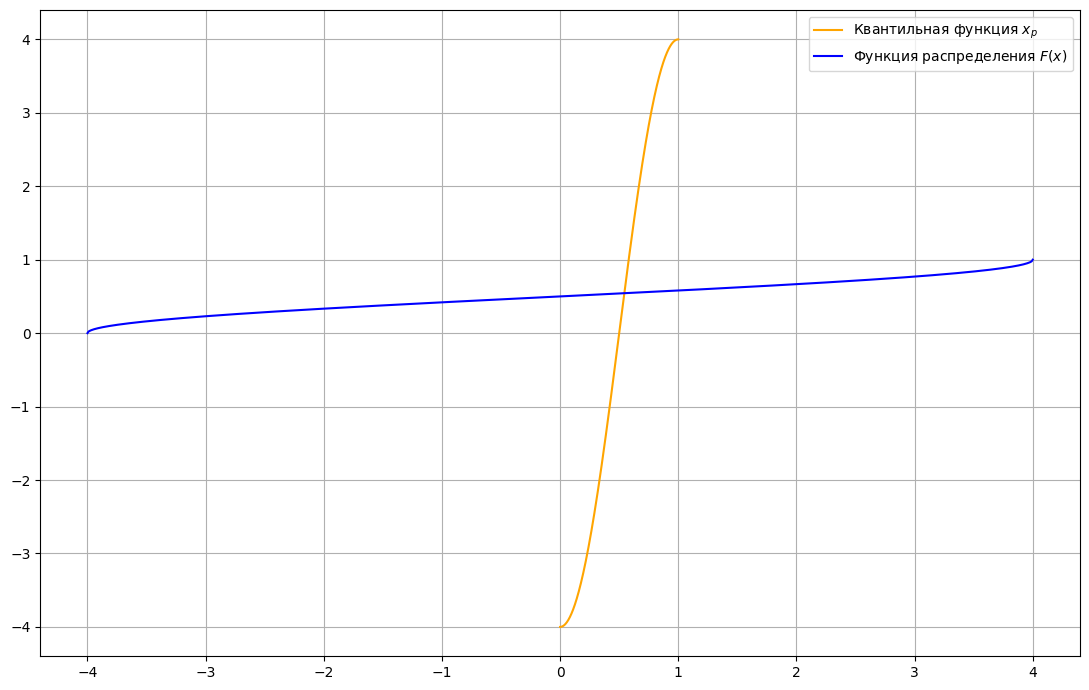

In [21]:
def quantil(p):
    return 4*np.sin(np.pi*(p-0.5))

def inv_quantil(x):
    p_values = np.linspace(0,1,1000)
    x_values = quantil(p_values)
    return np.interp(x,x_values,p_values)

p_values = np.linspace(0,1,1000)
x_p = quantil(p_values)

x_values = np.linspace(-4,4,1000)
p_x = inv_quantil(x_values)

plt.figure(figsize=(11, 7))
plt.plot(p_values,x_p,color="orange",label="Квантильная функция $x_p$")
plt.plot(x_values,p_x,color="blue",label="Функция распределения $F(x)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()